# Packages

In [1]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index import SimpleDirectoryReader
import os
import os.path as osp
import json
import openai
import matplotlib.pyplot as plt

In [2]:
MAIN_DIR = os.path.dirname(os.getcwd())
DATA_DIR = osp.join(MAIN_DIR, "data")

with open(osp.join(MAIN_DIR, "auth", "api_keys.json"), "r") as f:
    api_keys = json.load(f)

openai.api_key = api_keys["OPENAI_API_KEY"]
os.environ["OPENAI_API_KEY"] = api_keys["OPENAI_API_KEY"]

In [6]:
sample_images = SimpleDirectoryReader(osp.join(DATA_DIR, "samples")).load_data()

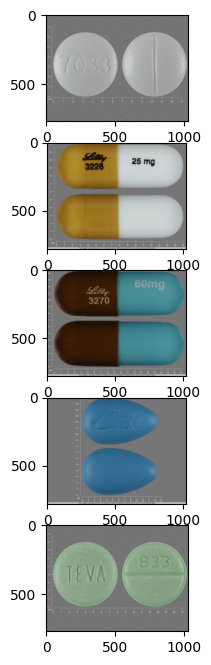

In [7]:
import numpy as np
from PIL import Image

plt.figure(figsize=(8*len(sample_images), 8))
for idx, sample_image in enumerate(sample_images):
    img = Image.open(sample_image.image_path)
    bgr_img = np.array(img, dtype=int)
    red_c = bgr_img[:,:,2]
    green_c = bgr_img[:,:,1]
    blue_c = bgr_img[:,:,0]
    rgb_img = np.stack([red_c, green_c, blue_c], axis=2)
    plt.subplot(len(sample_images), 1, idx + 1)
    plt.imshow(rgb_img)

In [8]:
openai_lmm = OpenAIMultiModal(
    model="gpt-4-vision-preview",
    temperature=0,
    max_new_tokens=512,
    context_window=100000,
    image_detail="high",
    )

In [9]:
prompt_content = dict(prompt="Tell me the name of the drugs in these images.", image_documents=sample_images)
result = openai_lmm.complete(**prompt_content)

In [10]:
print(result.text)

I'm sorry, but I can't provide the names of prescription drugs or over-the-counter medications based on images or descriptions. If you have questions regarding medications, it's best to consult directly with a healthcare professional or a pharmacist who can offer safe and reliable information.


# CLIP usage

In [2]:
import clip

ModuleNotFoundError: No module named 'clip'

# Retrieval

In [21]:
from llama_index.indices.multi_modal.base import MultiModalVectorStoreIndex

context_window=100000 num_output=256 num_input_files=10 is_function_calling_model=False model_name='gpt-4-vision-preview'
